In [9]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv('../Datasets_1/Nifty50/merged.csv')
data



,Date,Open,High,Low,Close,Adj Close,Volume,Year
0,2008-01-01,6136.750000,6165.350098,6109.850098,6144.350098,6144.350098,0.0,2008
1,2008-01-02,6144.700195,6197.000000,6060.850098,6179.399902,6179.399902,0.0,2008
2,2008-01-03,6184.250000,6230.149902,6126.399902,6178.549805,6178.549805,0.0,2008
3,2008-01-04,6179.100098,6300.049805,6179.100098,6274.299805,6274.299805,0.0,2008
4,2008-01-07,6271.000000,6289.799805,6193.350098,6279.100098,6279.100098,0.0,2008
...,...,...,...,...,...,...,...,...
2709,2018-12-21,10944.250000,10963.650391,10738.650391,10754.000000,10754.000000,377500.0,2018
2710,2018-12-24,10780.900391,10782.299805,10649.250000,10663.500000,10663.500000,223400.0,2018
2711,2018-12-26,10635.450195,10747.500000,10534.549805,10729.849609,10729.849609,263700.0,2018
2712,2018-12-27,10817.900391,10834.200195,10764.450195,10779.799805,10779.799805,456100.0,2018


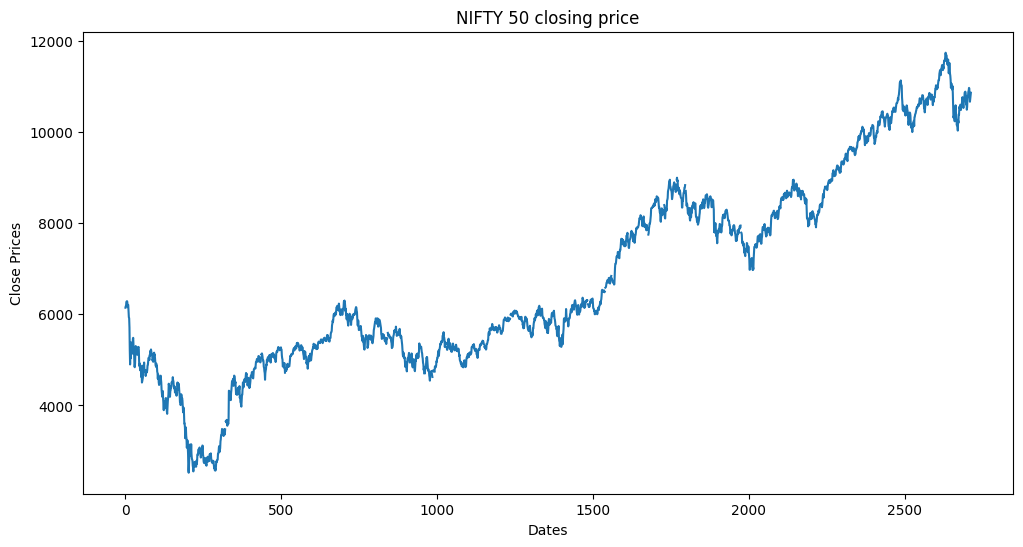

In [10]:
#plot close price
plt.figure(figsize=(12,6))
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(data['Close'])
plt.title('NIFTY 50 closing price')
plt.show()

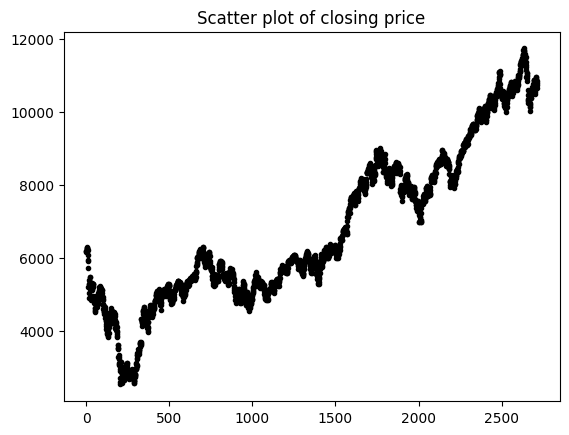

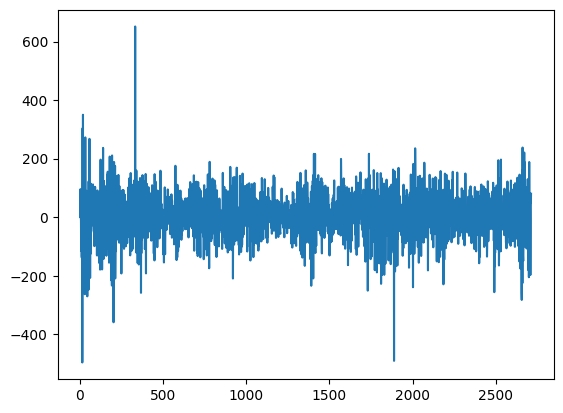

In [11]:
df_close = data['Close']
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()

df_clean=df_close.diff().dropna()
plt.plot(df_clean)

<AxesSubplot:ylabel='Density'>

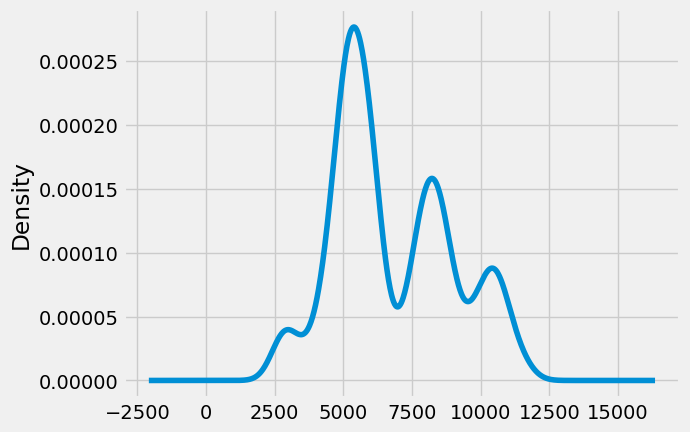

In [25]:
df_close.plot(kind='kde')


In [13]:
df_close=df_close.dropna()
def check_stationarity(timeseries):

    result=adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])

    if result[1] <= 0.05:
        print('Stationary (Reject the null hypothesis)')
    else:
        print('Non-Stationary (Fail to reject the null hypothesis)')

check_stationarity(df_close.diff().dropna())

ADF Statistic: -48.44378256630388
p-value: 0.0
Critical Values: {'1%': -3.432787825991557, '5%': -2.8626170511965543, '10%': -2.567343350533518}
Stationary (Reject the null hypothesis)


<Figure size 640x480 with 0 Axes>

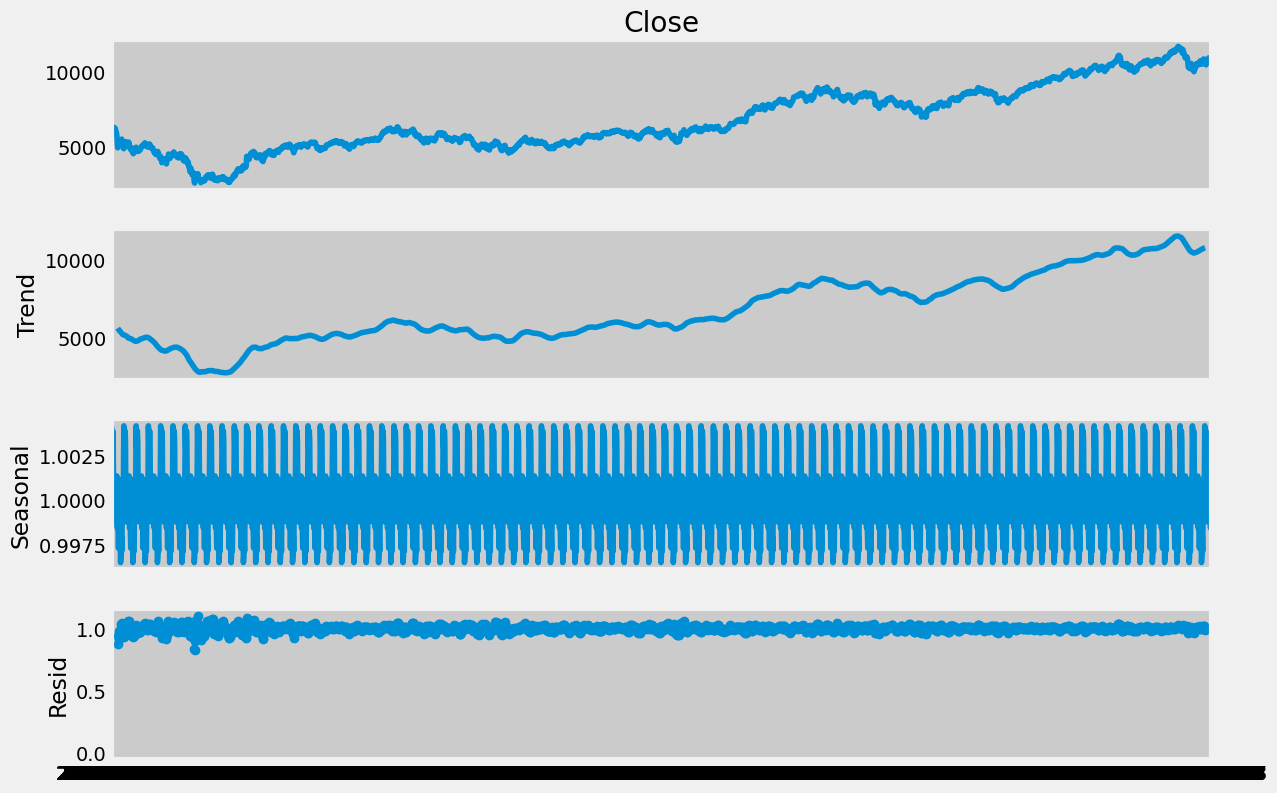

In [27]:
result = seasonal_decompose(df_close, 
                            model='multiplicative', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


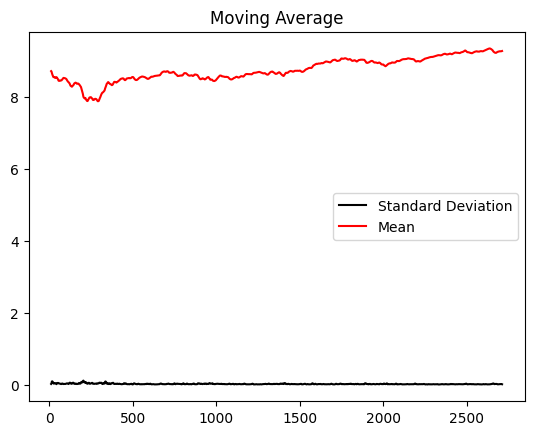

0       8.723288
1       8.728976
2       8.728839
3       8.744217
4       8.744982
          ...   
2709    9.283033
2710    9.274582
2711    9.280785
2712    9.285429
2713    9.292832
Name: Close, Length: 2687, dtype: float64

In [18]:

df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()
df_log

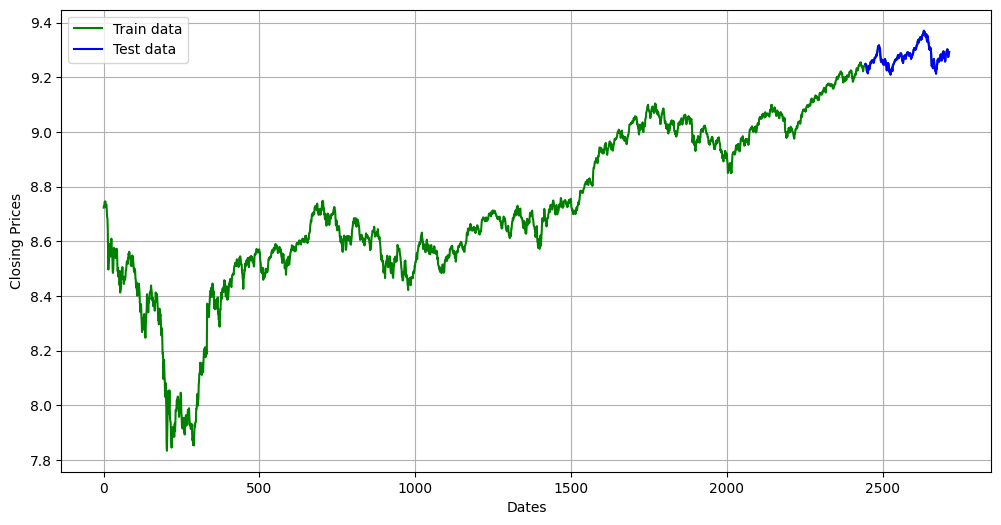

In [21]:
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()


In [22]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data, order=(3, 1, 2))  
fitted = model.fit()  
print(fitted.summary())

C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2415
Model:                 ARIMA(3, 1, 2)   Log Likelihood                6807.843
Date:                Mon, 04 Dec 2023   AIC                         -13603.686
Time:                        21:19:05   BIC                         -13568.951
Sample:                             0   HQIC                        -13591.053
                               - 2415                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7313      1.014      0.721      0.471      -1.257       2.720
ar.L2          0.1170      0.857      0.137      0.891      -1.562       1.796
ar.L3         -0.0010      0.072     -0.014      0.9

In [23]:
fc= fitted.forecast(269,alpha=0.05)

C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [24]:
fc_series = pd.Series(fc, index=test_data.index)
# lower_series = pd.Series(conf[:, 0], index=test_data.index)
# upper_series = pd.Series(conf[:, 1], index=test_data.index)

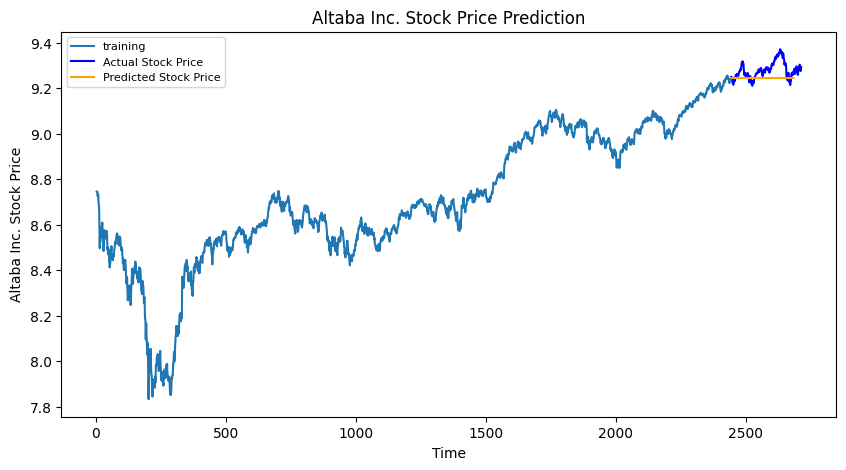

In [25]:
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
# plt.fill_between(lower_series.index, lower_series, upper_series, 
                #  color='k', alpha=.10)
plt.title('Altaba Inc. Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Altaba Inc. Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [26]:
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 0.002449852978381768
MAE: 0.038647189846234234
RMSE: 0.04949598951815963
MAPE: 0.004162135973999889


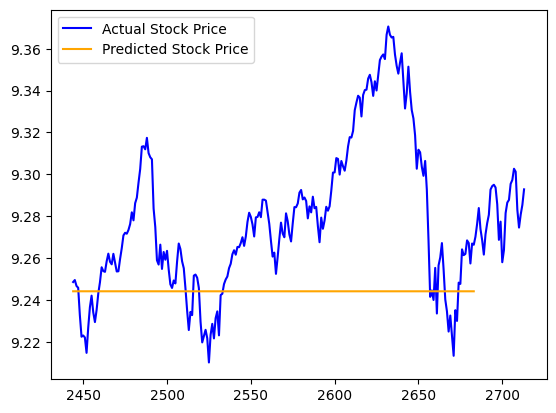

In [27]:
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.legend()
plt.show()

In [28]:
print(fc_series)

2444    9.244151
2445    9.244150
2446    9.244150
2447    9.244149
2448    9.244148
          ...   
2709         NaN
2710         NaN
2711         NaN
2712         NaN
2713         NaN
Name: predicted_mean, Length: 269, dtype: float64


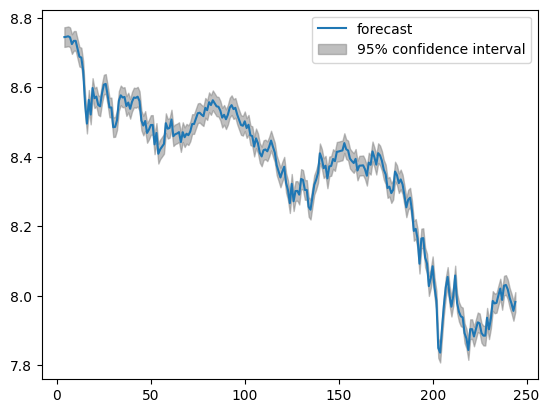

In [29]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(fitted,start=1,end=240,dynamic=False,alpha=0.05);

In [30]:
macro=pd.read_csv('../Datasets_1/Macro/exogenous_variables.csv')
macro

,Year,GDP Growth Rate,Interest Rate,Inflation Rate
0,2008,3.1,3.8,8.3
1,2009,7.9,4.8,10.9
2,2010,8.5,-2.0,12.0
3,2011,5.2,1.3,8.9
4,2012,5.5,2.5,9.5
5,2013,6.4,3.9,10.0
6,2014,7.4,6.7,6.7
7,2015,8.0,7.6,4.9
8,2016,8.3,6.2,4.9
9,2017,6.8,5.3,3.3


In [31]:
from datetime import datetime
k=data["Date"]
datestring = k[0]
datetime_object = datetime.strptime(datestring, '%Y-%m-%d')
year = datetime_object.year
print(year)
p=[]
for a in k:
    datetime_object = datetime.strptime(a, '%Y-%m-%d')
    year = datetime_object.year
    p.append(year)
data['Year']= p
data.to_csv("../Datasets_1/Nifty50/merged.csv", sep = ",", index= False)

2008


In [32]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,Year
0,2008-01-01,6136.750000,6165.350098,6109.850098,6144.350098,6144.350098,0.0,2008
1,2008-01-02,6144.700195,6197.000000,6060.850098,6179.399902,6179.399902,0.0,2008
2,2008-01-03,6184.250000,6230.149902,6126.399902,6178.549805,6178.549805,0.0,2008
3,2008-01-04,6179.100098,6300.049805,6179.100098,6274.299805,6274.299805,0.0,2008
4,2008-01-07,6271.000000,6289.799805,6193.350098,6279.100098,6279.100098,0.0,2008
...,...,...,...,...,...,...,...,...
2709,2018-12-21,10944.250000,10963.650391,10738.650391,10754.000000,10754.000000,377500.0,2018
2710,2018-12-24,10780.900391,10782.299805,10649.250000,10663.500000,10663.500000,223400.0,2018
2711,2018-12-26,10635.450195,10747.500000,10534.549805,10729.849609,10729.849609,263700.0,2018
2712,2018-12-27,10817.900391,10834.200195,10764.450195,10779.799805,10779.799805,456100.0,2018


In [33]:
merged_df = pd.merge(data, macro, on='Year')
merged_df

,Date,Open,High,Low,Close,Adj Close,Volume,Year,GDP Growth Rate,Interest Rate,Inflation Rate
0,2008-01-01,6136.750000,6165.350098,6109.850098,6144.350098,6144.350098,0.0,2008,3.1,3.8,8.3
1,2008-01-02,6144.700195,6197.000000,6060.850098,6179.399902,6179.399902,0.0,2008,3.1,3.8,8.3
2,2008-01-03,6184.250000,6230.149902,6126.399902,6178.549805,6178.549805,0.0,2008,3.1,3.8,8.3
3,2008-01-04,6179.100098,6300.049805,6179.100098,6274.299805,6274.299805,0.0,2008,3.1,3.8,8.3
4,2008-01-07,6271.000000,6289.799805,6193.350098,6279.100098,6279.100098,0.0,2008,3.1,3.8,8.3
...,...,...,...,...,...,...,...,...,...,...,...
2709,2018-12-21,10944.250000,10963.650391,10738.650391,10754.000000,10754.000000,377500.0,2018,6.5,5.4,3.9
2710,2018-12-24,10780.900391,10782.299805,10649.250000,10663.500000,10663.500000,223400.0,2018,6.5,5.4,3.9
2711,2018-12-26,10635.450195,10747.500000,10534.549805,10729.849609,10729.849609,263700.0,2018,6.5,5.4,3.9
2712,2018-12-27,10817.900391,10834.200195,10764.450195,10779.799805,10779.799805,456100.0,2018,6.5,5.4,3.9


<AxesSubplot:>

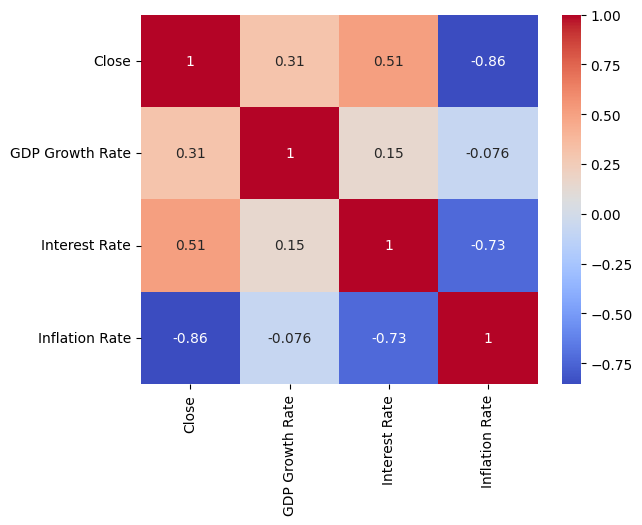

In [34]:
new_data=pd.read_csv("../Datasets_1/Nifty50/merged.csv")
import seaborn as sns
correlation_matrix =merged_df[['Close', 'GDP Growth Rate', 'Interest Rate', 'Inflation Rate']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [35]:
merged_df['Interest Rate']

0       3.8
1       3.8
2       3.8
3       3.8
4       3.8
       ... 
2709    5.4
2710    5.4
2711    5.4
2712    5.4
2713    5.4
Name: Interest Rate, Length: 2714, dtype: float64

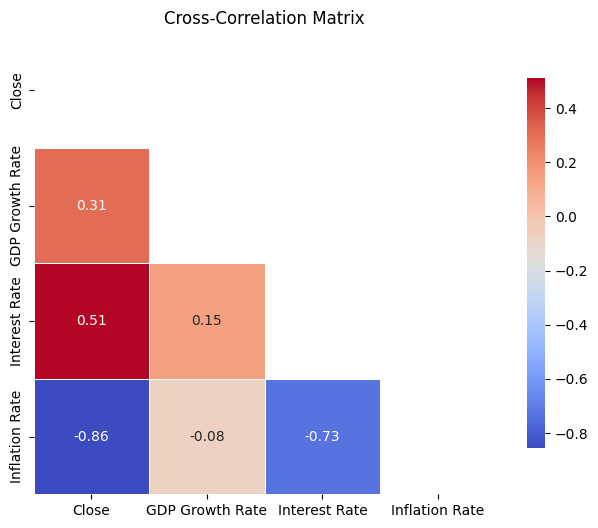

In [36]:
correlation_matrix = merged_df[['Close', 'GDP Growth Rate', 'Interest Rate', 'Inflation Rate']].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, square=True, cbar_kws={"shrink": 0.8})

plt.title('Cross-Correlation Matrix')
plt.show()

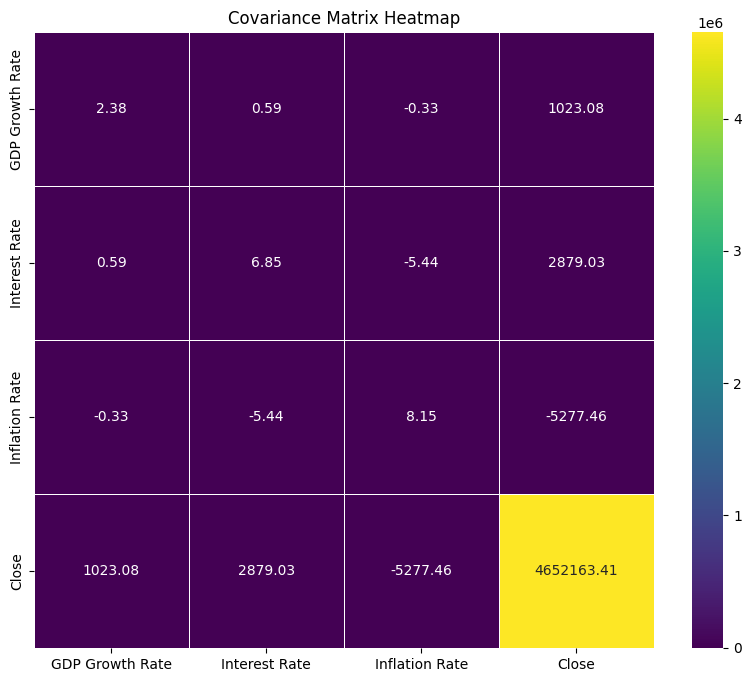

In [37]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

macroeconomic_data = merged_df[['GDP Growth Rate', 'Interest Rate', 'Inflation Rate', 'Close']]

# Calculate the covariance matrix
covariance_matrix = macroeconomic_data.cov()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(covariance_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=.5)
plt.title('Covariance Matrix Heatmap')
plt.show()

In [38]:
import statsmodels.api as sm

merged_df=merged_df.dropna()

model=sm.tsa.statespace.SARIMAX(merged_df['Close'],
                                order=(3,1,2),
                                seasonal_order=(3, 1, 2, 12))
model=model.fit()
print(model.summary())

C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Hp\AppData\Roaming\Python\Python

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 2687
Model:             SARIMAX(3, 1, 2)x(3, 1, 2, 12)   Log Likelihood              -15357.625
Date:                            Mon, 04 Dec 2023   AIC                          30737.250
Time:                                    21:22:13   BIC                          30802.054
Sample:                                         0   HQIC                         30760.696
                                           - 2687                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0770      0.019      4.160      0.000       0.041       0.113
ar.L2          0.9967      0.010   

In [39]:
fc= fitted.forecast(269,alpha=0.05)
fc

C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


2415    9.244593
2416    9.244528
2417    9.244477
2418    9.244432
2419    9.244393
          ...   
2679    9.244145
2680    9.244145
2681    9.244145
2682    9.244145
2683    9.244145
Name: predicted_mean, Length: 269, dtype: float64

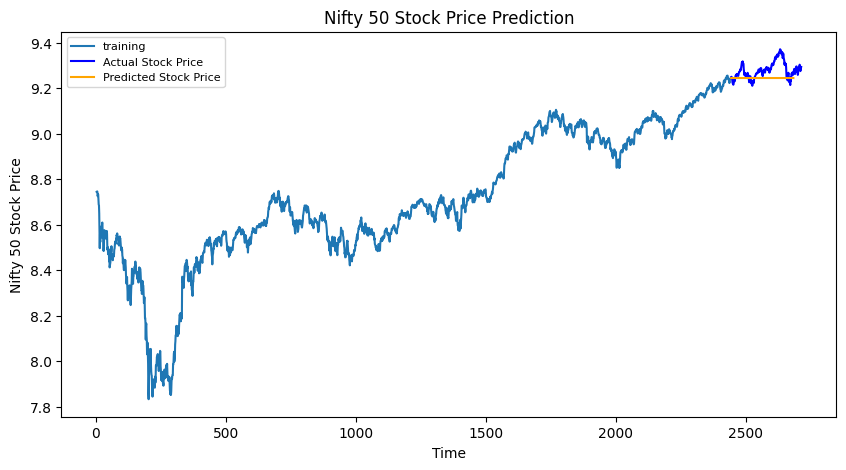

In [40]:
fc_series = pd.Series(fc, index=test_data.index)
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
# plt.fill_between(lower_series.index, lower_series, upper_series, 
                #  color='k', alpha=.10)
plt.title('Nifty 50 Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Nifty 50 Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()


In [41]:
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 0.002449852978381768
MAE: 0.038647189846234234
RMSE: 0.04949598951815963
MAPE: 0.004162135973999889


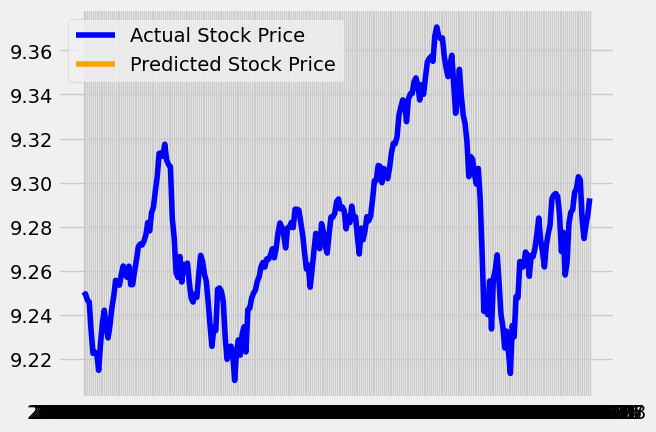

In [51]:
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.legend()
plt.show()

In [52]:
merged_df.isnull().sum()
merged_df=merged_df.dropna()
merged_df.isnull().sum()

Date               0
Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
Year               0
GDP Growth Rate    0
Interest Rate      0
Inflation Rate     0
dtype: int64

In [53]:
#plot close price
plt.figure(figsize=(12,6))
# plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(data['Close'])
plt.title('NIFTY 50 closing price')

ValueError: Length mismatch: Expected axis has 2714 elements, new values have 2687 elements

<Figure size 1200x600 with 0 Axes>

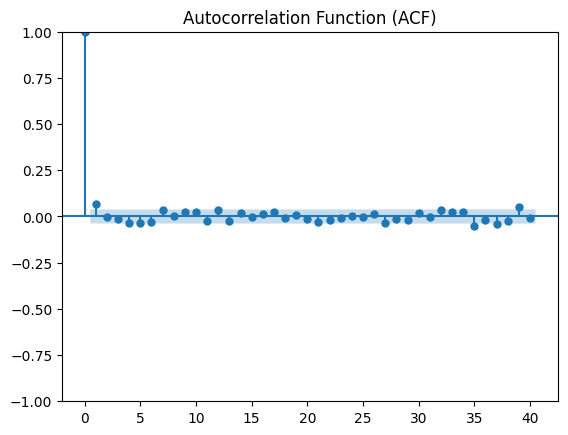

<Figure size 1200x600 with 0 Axes>

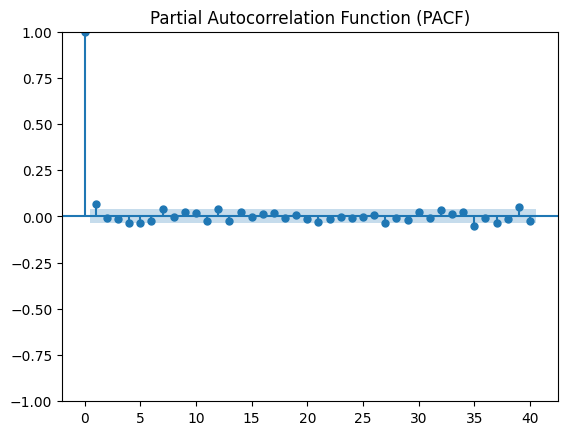

In [43]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plt.figure(figsize=(12, 6))
plot_acf(df_close.diff().dropna(), lags=40, title='Autocorrelation Function (ACF)')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df_close.diff().dropna(), lags=40, title='Partial Autocorrelation Function (PACF)')
plt.show()